In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv('..\\data\\cement_data.csv')
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [4]:
df.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

# only need to take the name of column

In [5]:
def extract_name(s):
    idx = -1
    name = ''
    for i in range(len(s)):
        if s[i] == '(':
            name = s[0:i-1]
            return name

In [6]:
columns = list(df.columns)
columns

['Cement (component 1)(kg in a m^3 mixture)',
 'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
 'Fly Ash (component 3)(kg in a m^3 mixture)',
 'Water  (component 4)(kg in a m^3 mixture)',
 'Superplasticizer (component 5)(kg in a m^3 mixture)',
 'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
 'Fine Aggregate (component 7)(kg in a m^3 mixture)',
 'Age (day)',
 'Concrete compressive strength(MPa, megapascals) ']

In [7]:
new_col_names = []

for i in range(len(columns)):
    name = extract_name(columns[i])
    new_col_names.append(name)

new_col_names

['Cement',
 'Blast Furnace Slag',
 'Fly Ash',
 'Water ',
 'Superplasticizer',
 'Coarse Aggregate ',
 'Fine Aggregate',
 'Age',
 'Concrete compressive strengt']

# Update column name

In [8]:
df.columns = new_col_names
df.columns

Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water ', 'Superplasticizer',
       'Coarse Aggregate ', 'Fine Aggregate', 'Age',
       'Concrete compressive strengt'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Cement                        1030 non-null   float64
 1   Blast Furnace Slag            1030 non-null   float64
 2   Fly Ash                       1030 non-null   float64
 3   Water                         1030 non-null   float64
 4   Superplasticizer              1030 non-null   float64
 5   Coarse Aggregate              1030 non-null   float64
 6   Fine Aggregate                1030 non-null   float64
 7   Age                           1030 non-null   int64  
 8   Concrete compressive strengt  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [10]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strengt
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [11]:
df.skew()

Cement                          0.509517
Blast Furnace Slag              0.800737
Fly Ash                         0.537445
Water                           0.074324
Superplasticizer                0.908113
Coarse Aggregate               -0.040206
Fine Aggregate                 -0.252979
Age                             3.269177
Concrete compressive strengt    0.416922
dtype: float64

# data in not skewed

In [12]:
df.duplicated().sum()

25

# duplicate rows are present

In [13]:
duplicate_rows = df[df.duplicated()]
duplicate_rows

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strengt
77,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.398217
80,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.398217
86,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.301171
88,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.301171
91,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.301171
100,425.0,106.3,0.0,153.5,16.5,852.1,887.1,7,49.201007
103,425.0,106.3,0.0,153.5,16.5,852.1,887.1,7,49.201007
109,362.6,189.0,0.0,164.9,11.6,944.7,755.8,7,55.895819
111,362.6,189.0,0.0,164.9,11.6,944.7,755.8,7,55.895819
123,425.0,106.3,0.0,153.5,16.5,852.1,887.1,28,60.294676


# removing duplicate values

In [14]:
df.drop_duplicates(keep="first", inplace=True)
df.duplicated().sum()

0

In [15]:
df

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strengt
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


# we need to re-index our data

In [16]:
df.reset_index(inplace=True, drop=True)
df

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strengt
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1000,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1001,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1002,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1003,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


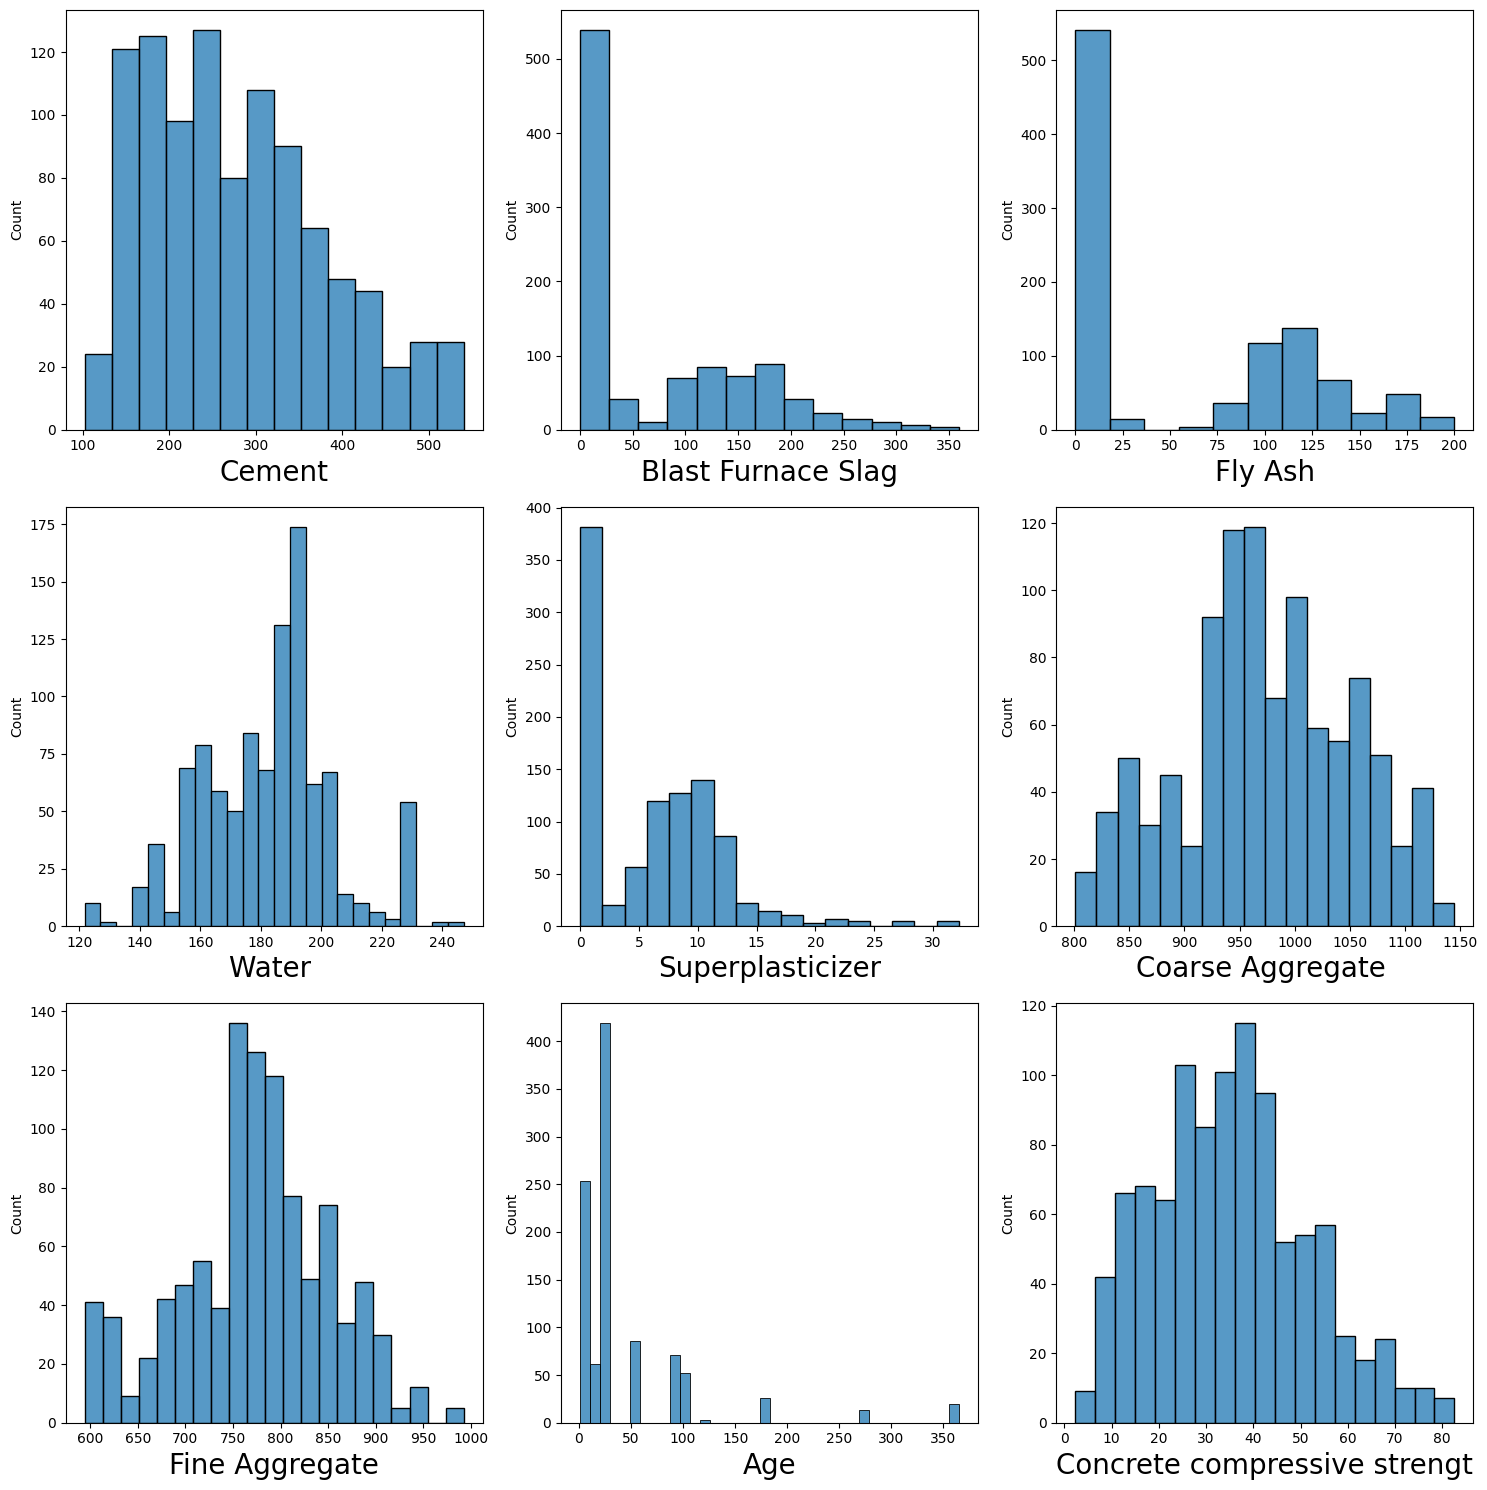

In [17]:
plt.figure(figsize=(15,15), facecolor='white')
plotnumber = 1
for i in df.columns :
    ax = plt.subplot(3,3, plotnumber)
    sns.histplot(df[i])
    plt.xlabel(i, fontsize = 20)
    plotnumber += 1
plt.tight_layout()

<Axes: >

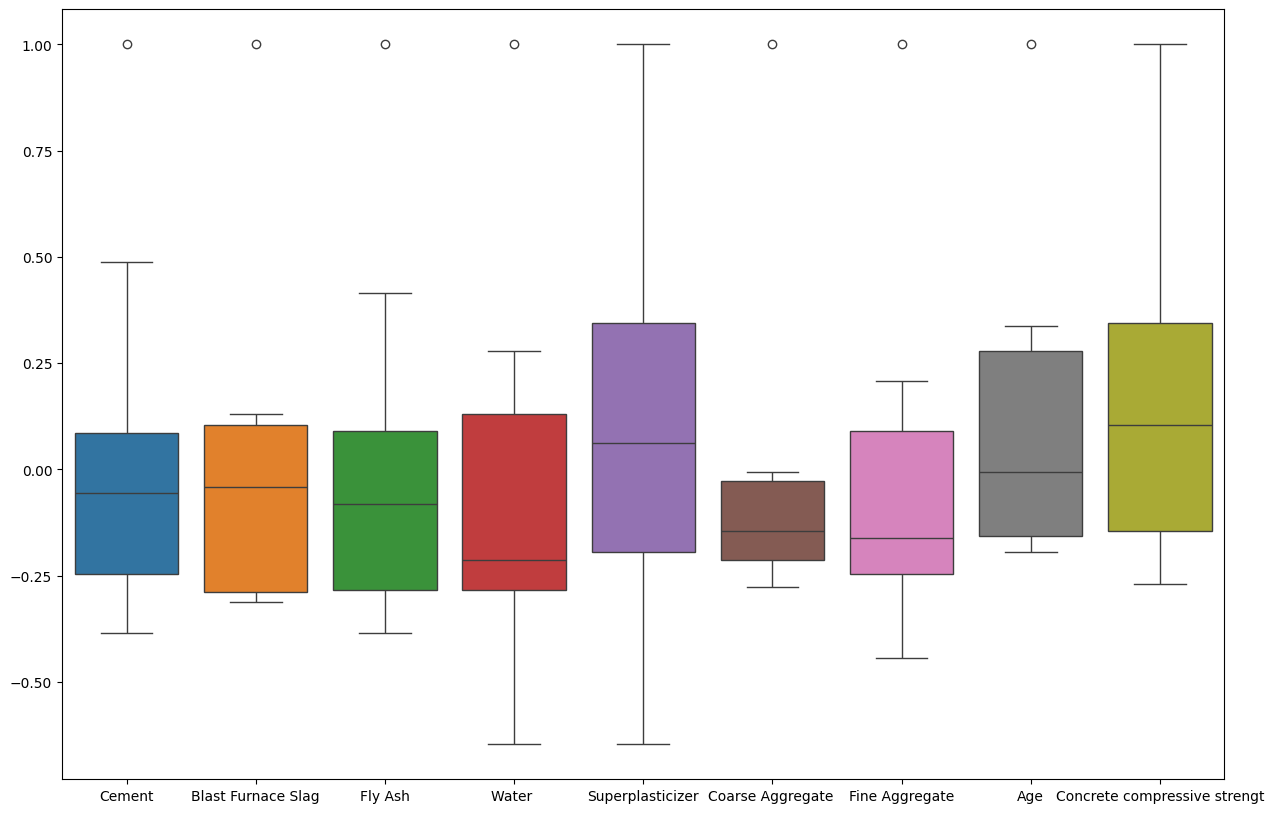

In [18]:
plt.figure(figsize=(15,10))
sns.boxplot(df.corr())

# data don't have mcuh outliers

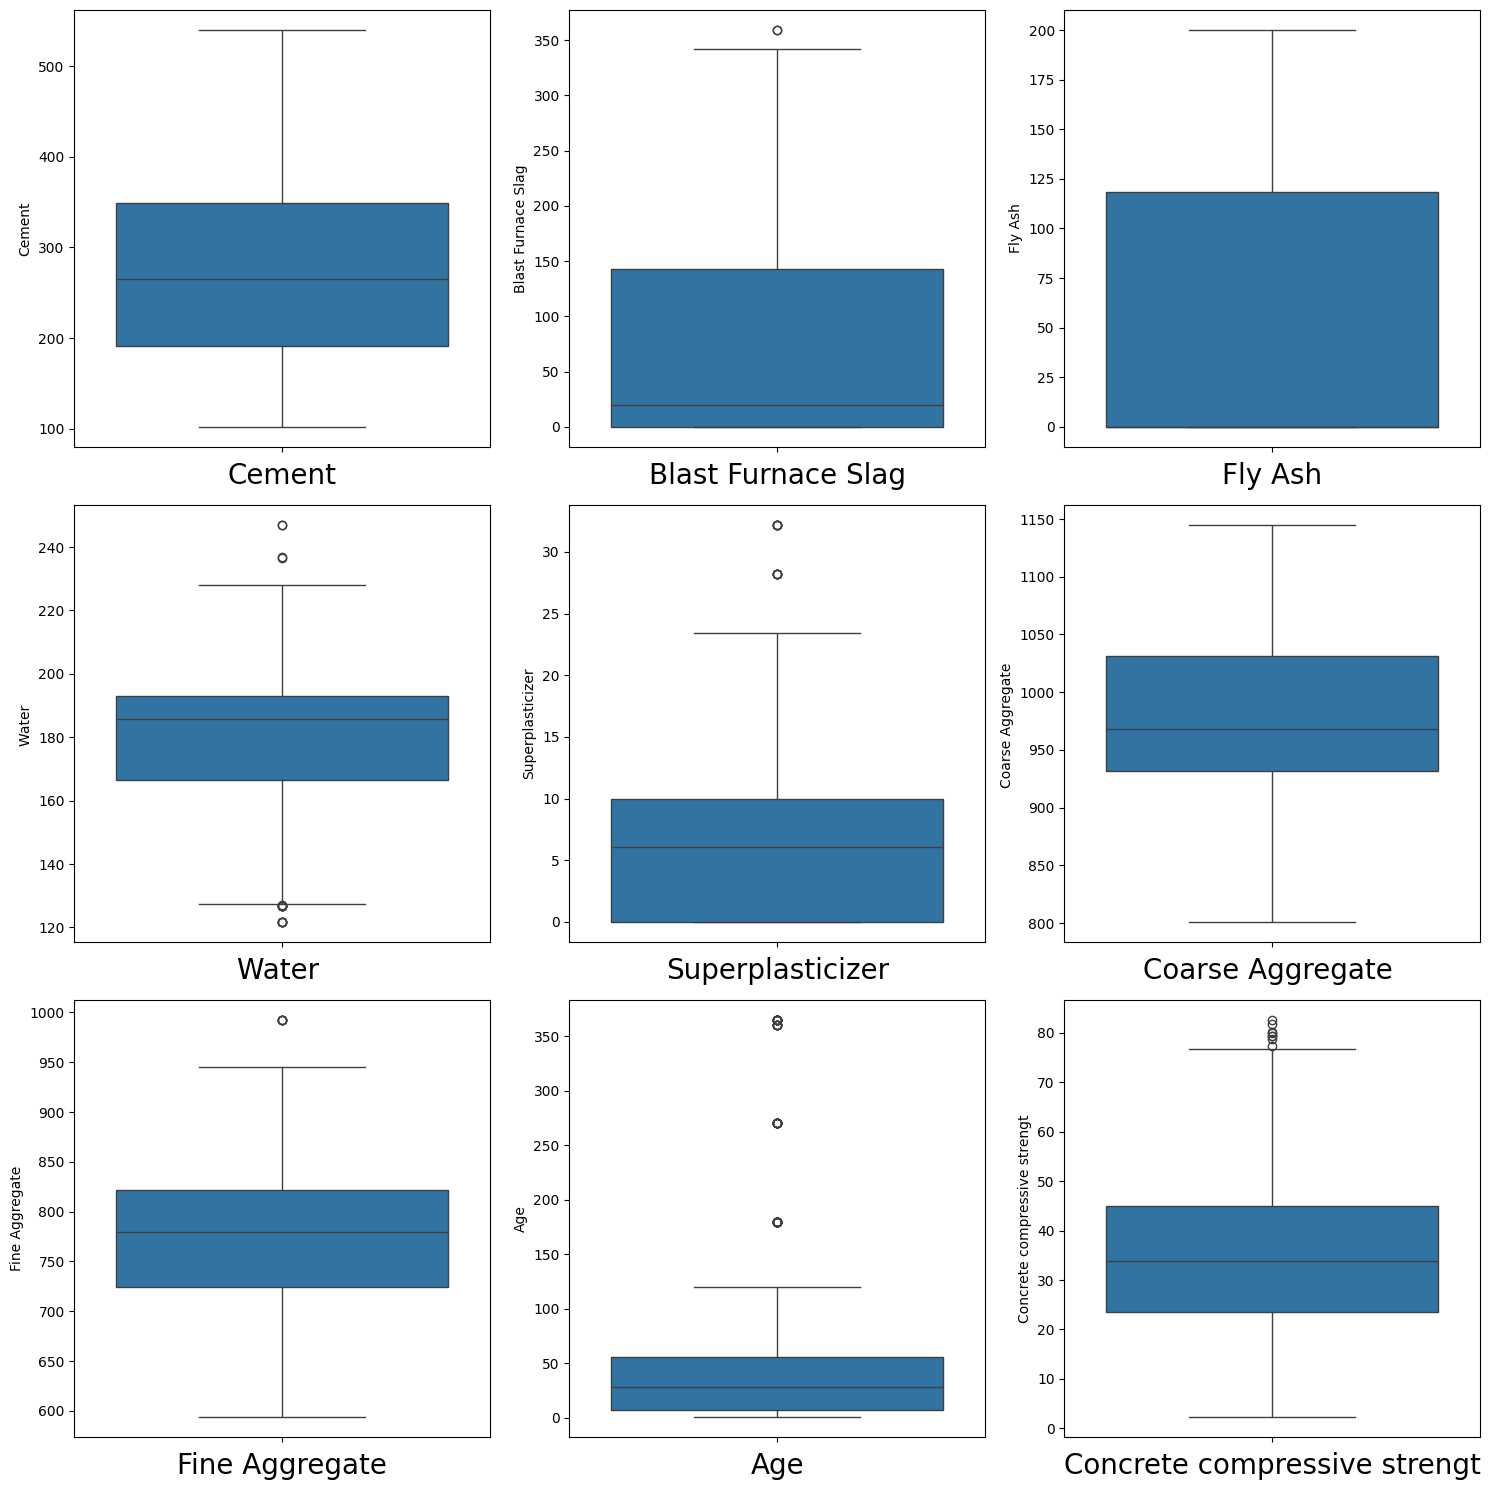

In [19]:
plt.figure(figsize=(15,15), facecolor='white')
plotnumber = 1
for i in df.columns :
    ax = plt.subplot(3,3, plotnumber)
    sns.boxplot(df[i])
    plt.xlabel(i, fontsize = 20)
    plotnumber += 1
plt.tight_layout()

<Axes: >

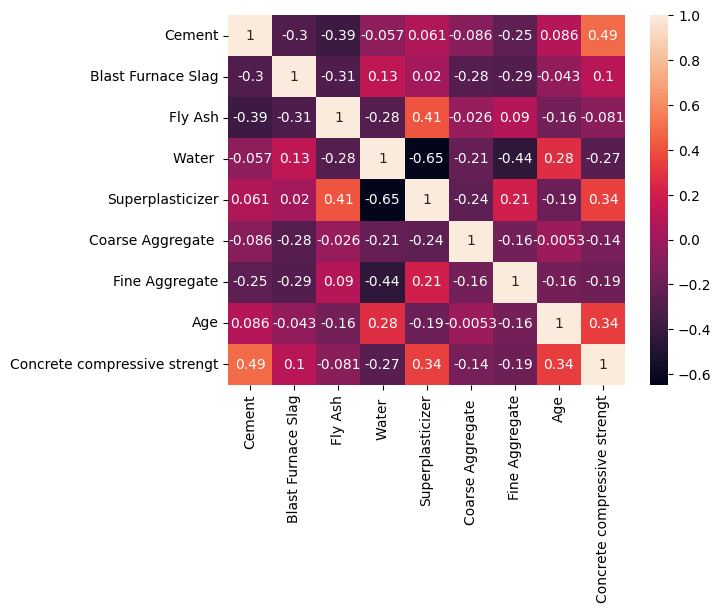

In [20]:
sns.heatmap(df.corr(), annot=True)

# columns are not highly correlated but meed to remove outliers

In [21]:
df.columns

Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water ', 'Superplasticizer',
       'Coarse Aggregate ', 'Fine Aggregate', 'Age',
       'Concrete compressive strengt'],
      dtype='object')

In [22]:
outliers = ['Blast Furnace Slag', 'Water ', 'Superplasticizer','Age', 'Fine Aggregate']

In [23]:
def outliers_capping(dataframe:pd.DataFrame, outliers:list):
    data = dataframe.copy()
    for i in outliers :
        q1 = data[i].quantile(0.25)
        q3 = data[i].quantile(0.75)
        iqr = q3-q1
        upper_limit = q3+1.5*iqr
        lower_limit = q1-1.5*iqr
        data.loc[data[i] > upper_limit, i] = upper_limit
        data.loc[data[i] < lower_limit, i] = lower_limit
    return data

df_new = outliers_capping(df, outliers)
df_new

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strengt
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28.0,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28.0,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,129.5,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,129.5,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,129.5,44.296075
...,...,...,...,...,...,...,...,...,...
1000,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28.0,44.284354
1001,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28.0,31.178794
1002,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28.0,23.696601
1003,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28.0,32.768036


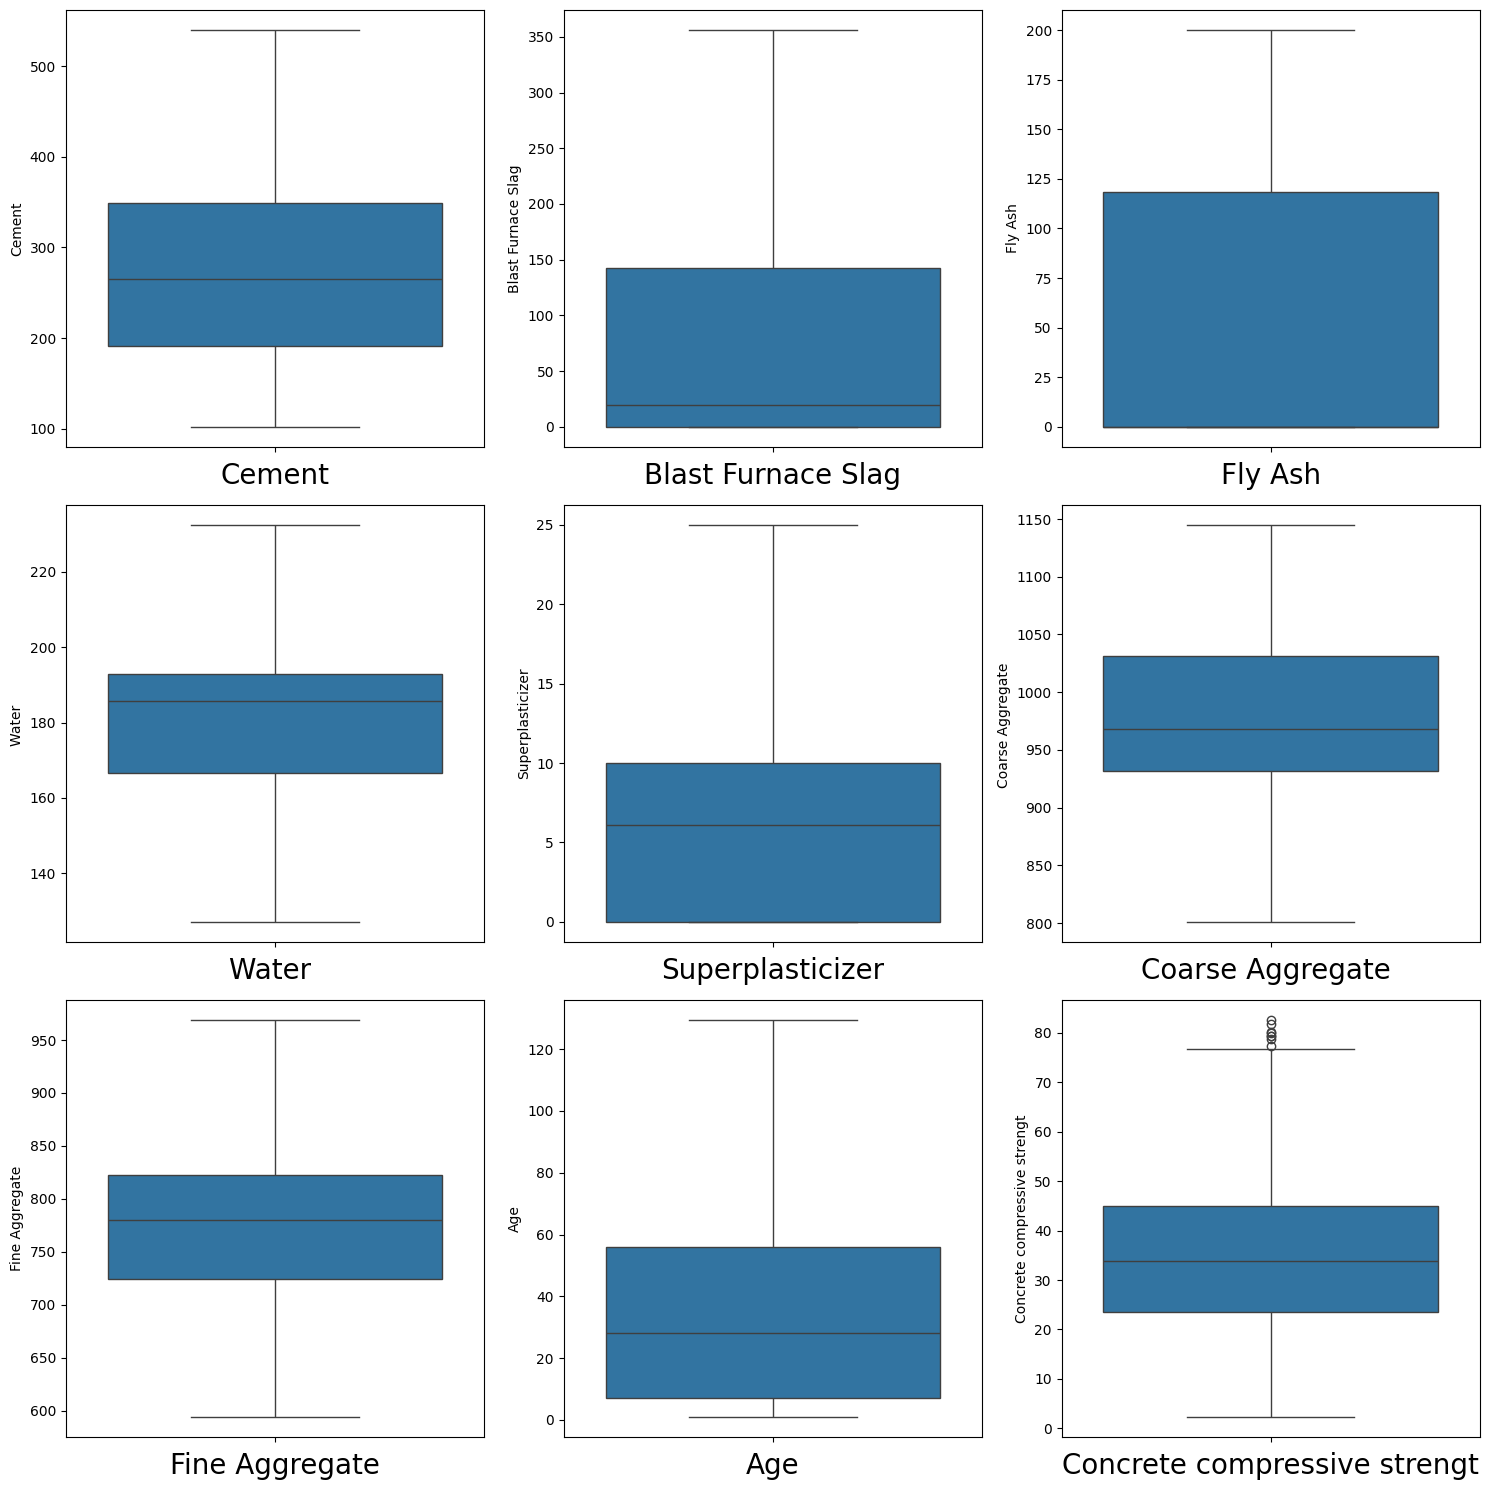

In [24]:
plt.figure(figsize=(15,15), facecolor='white')
plotnumber = 1
for i in df.columns :
    ax = plt.subplot(3,3, plotnumber)
    sns.boxplot(df_new[i])
    plt.xlabel(i, fontsize = 20)
    plotnumber += 1
plt.tight_layout()

# outliers have been removed from data

In [25]:
df = df_new
df.columns

Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water ', 'Superplasticizer',
       'Coarse Aggregate ', 'Fine Aggregate', 'Age',
       'Concrete compressive strengt'],
      dtype='object')

In [26]:
X = df.drop('Concrete compressive strengt', axis = 1)
y = df['Concrete compressive strengt']

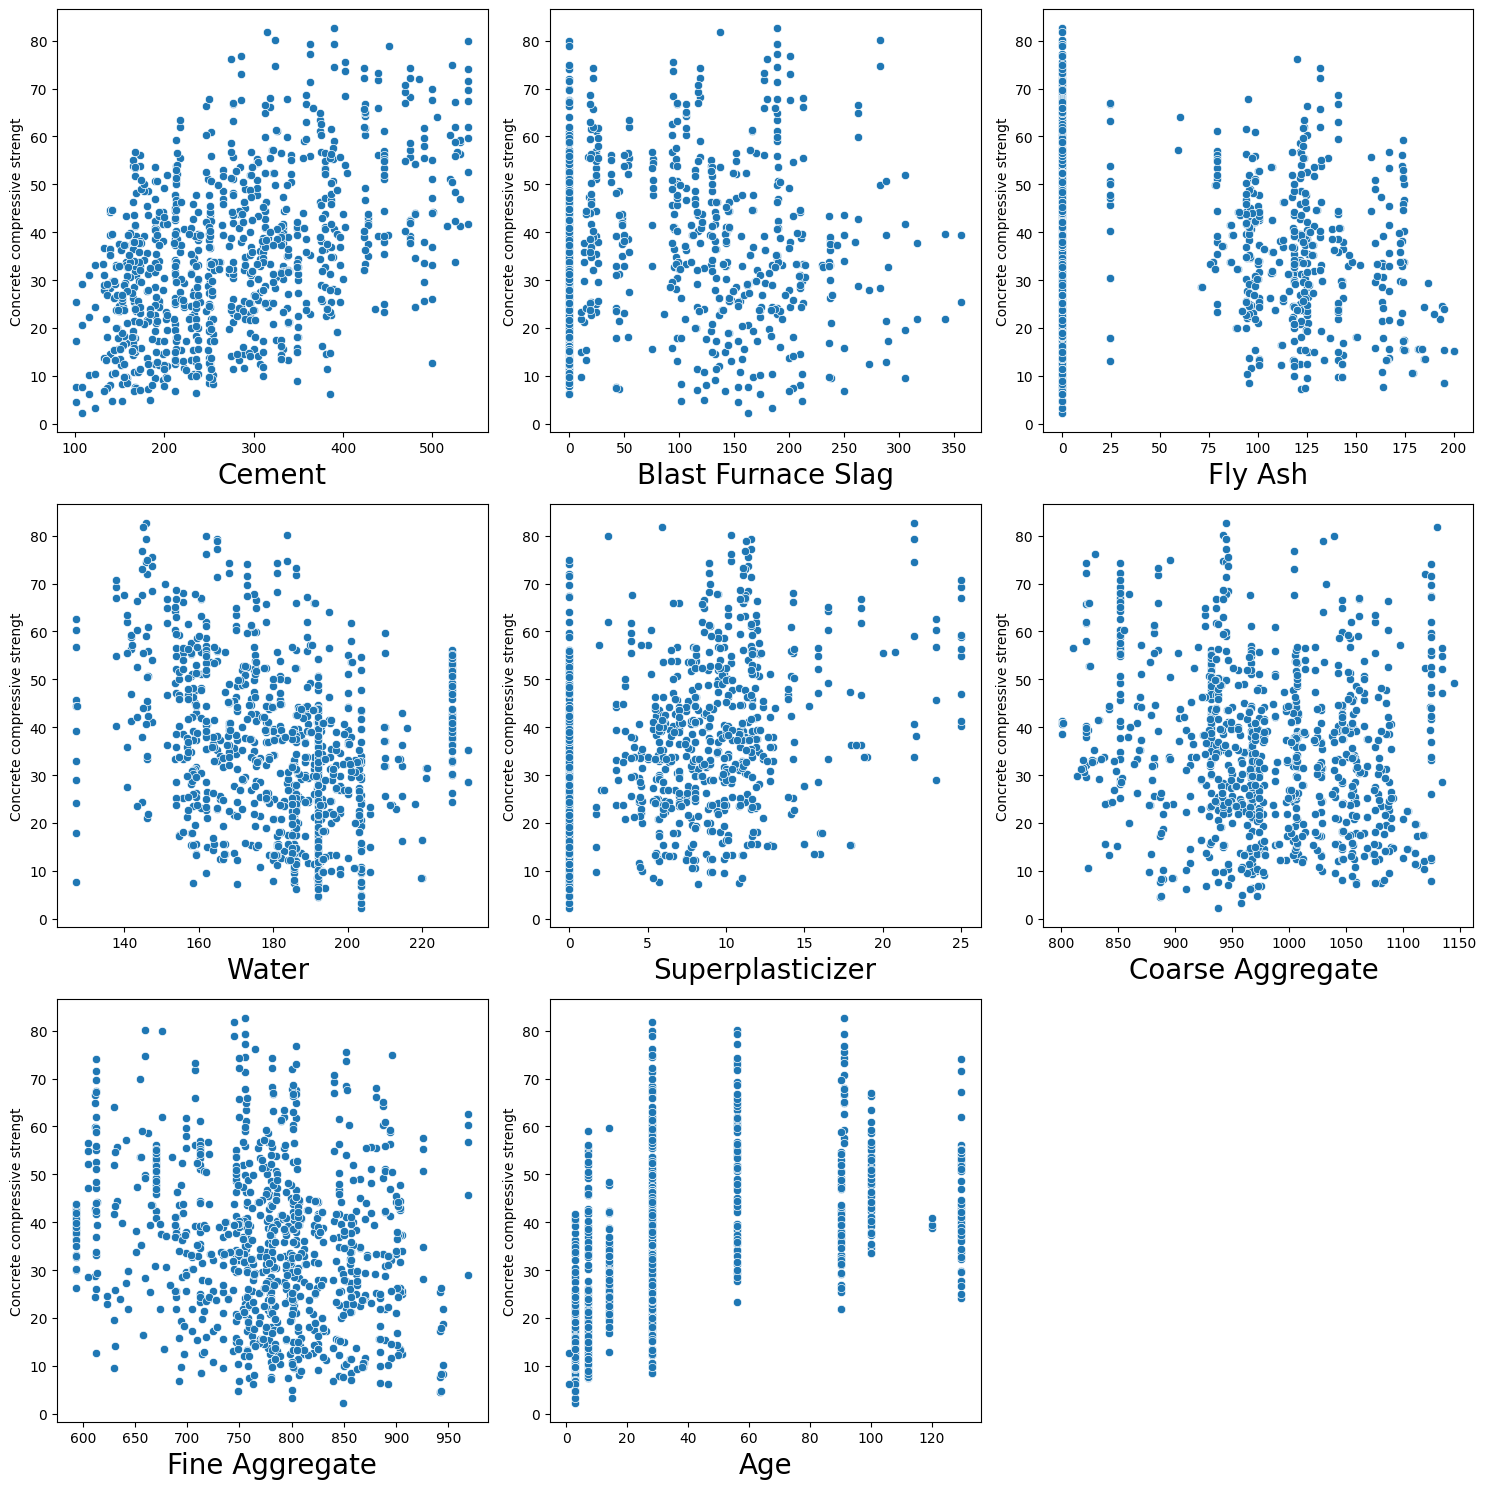

In [27]:
plt.figure(figsize=(15,15), facecolor='white')
plotnumber = 1
for i in X.columns :
    ax = plt.subplot(3,3, plotnumber)
    sns.scatterplot(x=df[i], y=y)
    plt.xlabel(i, fontsize = 20)
    plotnumber += 1
plt.tight_layout()

<Axes: >

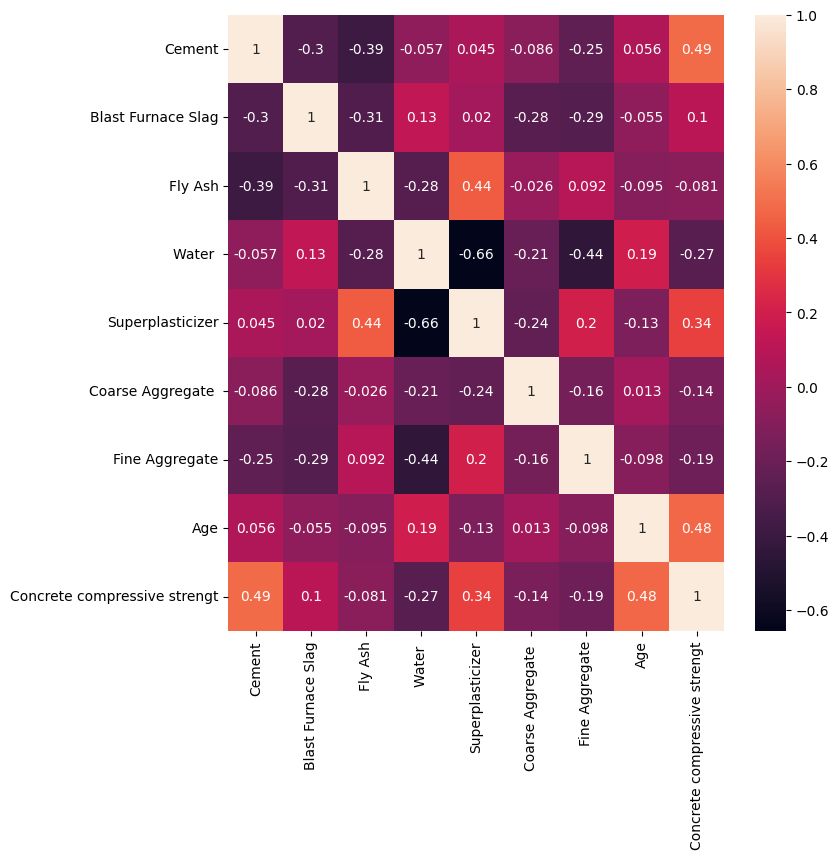

In [28]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), annot=True)

In [29]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=42)

In [30]:
# importing the required algorithm
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score

In [31]:
models = {'LinearRegression':LinearRegression(),
          'Ridge' : Ridge(alpha=1),
          'Lasso' : Lasso(alpha=1),
          'RandomForestRegressor': RandomForestRegressor(max_depth=5),
          'GradientBoostingRegressor' : GradientBoostingRegressor(learning_rate=0.1),
          'KNeighborsRegressor' : KNeighborsRegressor()}

In [32]:
models['RandomForestRegressor']

RandomForestRegressor(max_depth=5)

In [33]:
models.keys()

dict_keys(['LinearRegression', 'Ridge', 'Lasso', 'RandomForestRegressor', 'GradientBoostingRegressor', 'KNeighborsRegressor'])

In [34]:
def evaluate_model(preprocessor, xtrain, ytrain, xtest, ytest, models):
    for model_name, model in models.items():
        pipeline = make_pipeline(preprocessor, model)
        pipeline.fit(xtrain, ytrain)
        ypred = pipeline.predict(xtest)
        mse = mean_squared_error(ytest, ypred)
        score = r2_score(ytest, ypred)
        print(f"{model_name} - Mean Squared Error : {mse:.2f}")
        print(f"{model_name} - R2 Score : {score:.2f}")

In [35]:
preprocessor_01 = make_pipeline(KNNImputer(n_neighbors=3), StandardScaler())
preprocessor_02 = make_pipeline(KNNImputer(n_neighbors=3), MinMaxScaler())
preprocessor_03 = make_pipeline(KNNImputer(n_neighbors=3), RobustScaler())

In [36]:
print(f"{'*'*20} Standard Scaler {'*'*20}")
evaluate_model(preprocessor_01, xtrain, ytrain, xtest, ytest, models)

print(f"\n{'*'*20} MinMaxScaler {'*'*20}")
evaluate_model(preprocessor_02, xtrain, ytrain, xtest, ytest, models)

print(f"\n{'*'*20} RobustScaler {'*'*20}")
evaluate_model(preprocessor_03, xtrain, ytrain, xtest, ytest, models)

******************** Standard Scaler ********************
LinearRegression - Mean Squared Error : 90.53
LinearRegression - R2 Score : 0.69
Ridge - Mean Squared Error : 90.40
Ridge - R2 Score : 0.69
Lasso - Mean Squared Error : 102.45
Lasso - R2 Score : 0.64
RandomForestRegressor - Mean Squared Error : 51.47
RandomForestRegressor - R2 Score : 0.82
GradientBoostingRegressor - Mean Squared Error : 32.69
GradientBoostingRegressor - R2 Score : 0.89
KNeighborsRegressor - Mean Squared Error : 81.66
KNeighborsRegressor - R2 Score : 0.72

******************** MinMaxScaler ********************
LinearRegression - Mean Squared Error : 90.53
LinearRegression - R2 Score : 0.69
Ridge - Mean Squared Error : 90.31
Ridge - R2 Score : 0.69
Lasso - Mean Squared Error : 181.19
Lasso - R2 Score : 0.37
RandomForestRegressor - Mean Squared Error : 51.46
RandomForestRegressor - R2 Score : 0.82
GradientBoostingRegressor - Mean Squared Error : 32.37
GradientBoostingRegressor - R2 Score : 0.89
KNeighborsRegressor

In [37]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required at each leaf node
}

gcv = GridSearchCV(RandomForestRegressor(), param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, verbose=2)
gcv.fit(xtrain, ytrain)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END ma

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error', verbose=2)

In [38]:
gcv.best_params_

{'max_depth': 20,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [39]:
gcv.best_score_

-27.939403864937628

In [40]:
best_rf = RandomForestRegressor(max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200)
best_rf.fit(xtrain, ytrain)
y_pred =  best_rf.predict(xtest)
score = r2_score(y_pred, ytest)
print(f" r2_score : {score}")

 r2_score : 0.8672210715227946


In [41]:
import pickle as pkl
pkl.dump(best_rf, open('best_rf.pkl', 'wb'))

In [45]:
# will create a flask server and will deploy this